# Fantasy Premier League 2022/2023 season analysis

We cleaned the data and made some changes. Now let's get started to explore the data and their statistics. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotnine import aes, ggplot, geom_col, labs, ylim, scale_x_discrete, geom_point, xlim, theme, geom_density
from adjustText import adjust_text
import warnings

#Turn off warnings
warnings.filterwarnings('ignore')

#Importing cleaned data
df_clean = pd.read_csv('data/players_clean.csv')

In our analysis we will only have players that was playing more than 30% of all possible playtime in season. Other players that can't even fit in reserve of a squad are not relevant to analysis. It is simple as that player who plays more minutes score more points. That 30% of all playtime reflects starting for 12 times in season that have 38 matches.

In [2]:
#Slicing only players relevant for analysis (which starts 12 times in season)
df = df_clean[df_clean['starts'] > 12]
print("Number of all players: " +str(len(df_clean)) + ", Number of players that starts at least 12 times: " +str(len(df)))

Number of all players: 778, Number of players that starts at least 12 times: 285


There were 778 players. We see that number of players that starts at least 12 times is 285. Which is probably very close and accurate data because we have 20 teams and 11 players. which is 220. 

Let's view how this distribute among the teams.

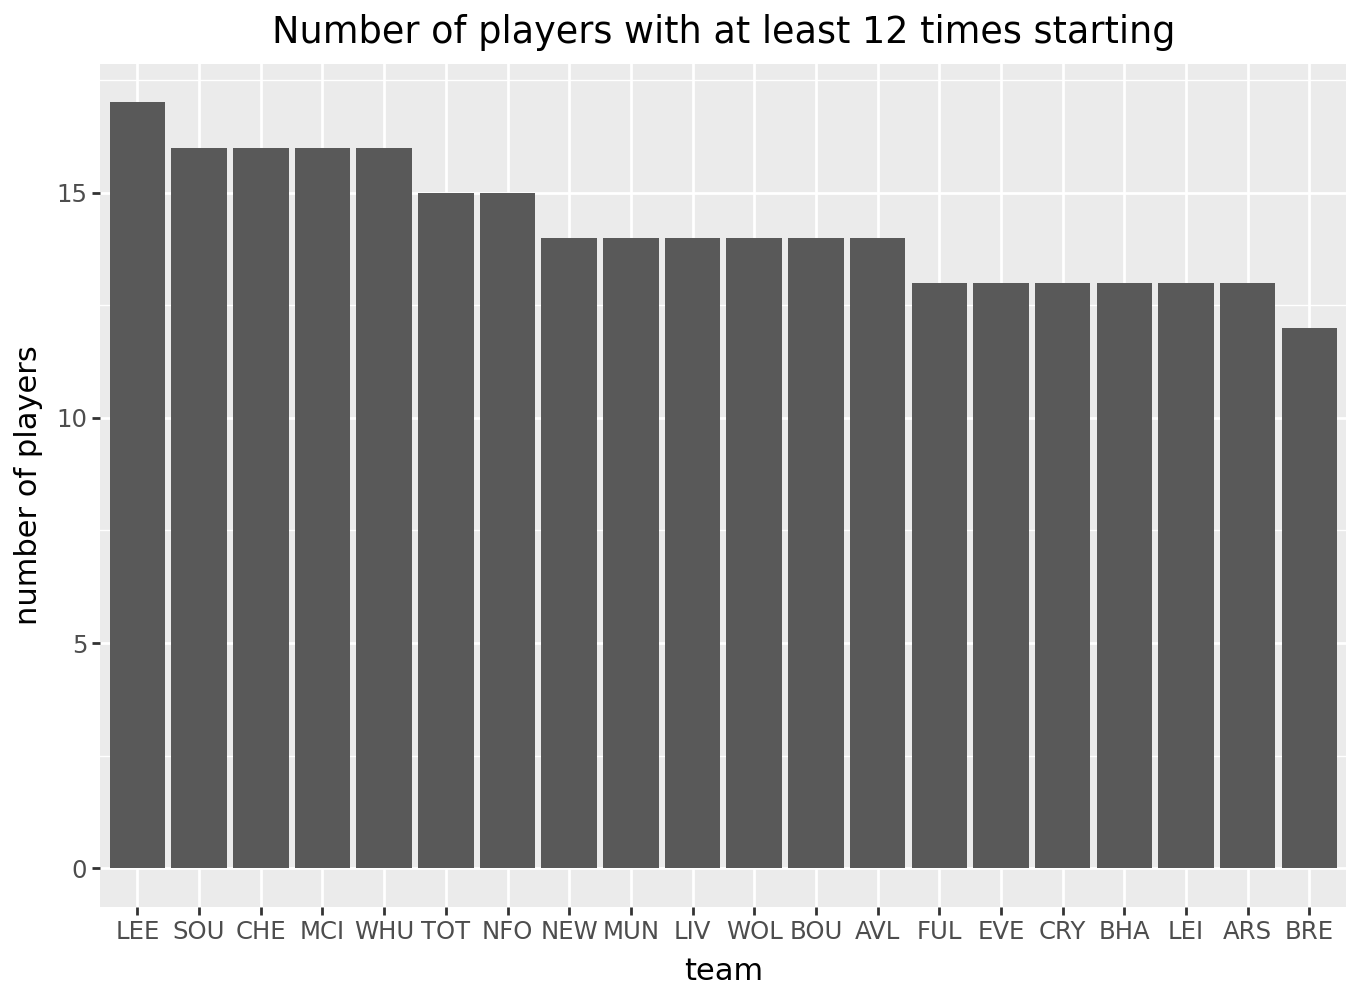

In [3]:
#plot 1 Number of players with at least 12 times starting
np_df = df.pivot_table('total_points',index='team', aggfunc='count').reset_index().rename_axis()
p1 = ggplot(np_df,aes(x= 'reorder(team,-total_points)' , y='total_points')) + geom_col() + \
     labs(x='team', y='number of players', title='Number of players with at least 12 times starting') +\
     theme(figure_size=(6.8, 5))
p1.show()

First observation is there were not that much changes in first eleven players across all league. Despite Leeds, Southampton, Chelsea and Manchester City all teams had really steady first eleven. Brentford had the most steady first eleven players. This should affect some decision making in picking players as we want the most steady players in our team.

Now let's view all relevant columns and their statistics such as mean, standard deviation, minimum, maximum and quantiles.

In [4]:
#Viewing relevant columns and their statistics
col = ['total_points','points_per_game','price','goals_scored','assists','ict_index','minutes','bonus','clean_sheets',
       'clean_sheets_per_90','creativity','expected_assists','expected_assists_per_90','expected_goal_involvements',
       'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded','expected_goals_conceded_per_90',
       'expected_goals_per_90', 'goals_conceded', 'goals_conceded_per_90', 'influence','own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'red_cards', 'saves', 'saves_per_90', 'selected_rank','starts',
       'starts_per_90','threat', 'value_form', 'value_season', 'yellow_cards','goal_involvements']
pd.set_option('display.expand_frame_repr', False)
print(df[col].describe().transpose())

                                   count         mean         std     min      25%      50%      75%      max
total_points                       285.0    91.982456   42.380940   25.00    60.00    85.00   118.00   272.00
points_per_game                    285.0     3.063509    1.018250    1.40     2.30     2.90     3.70     7.80
price                              285.0     5.326667    1.404466    3.80     4.50     4.90     5.60    13.10
goals_scored                       285.0     3.080702    4.576095    0.00     0.00     1.00     4.00    36.00
assists                            285.0     2.754386    3.140382    0.00     0.00     2.00     4.00    18.00
ict_index                          285.0   111.535789   66.547511   24.90    65.50    91.60   144.10   371.00
minutes                            285.0  2201.582456  670.404995  863.00  1620.00  2135.00  2766.00  3420.00
bonus                              285.0     7.610526    7.015016    0.00     3.00     6.00    11.00    48.00
clean_shee

This table of statistics that very clear view the data. Value season column is total points divided by price. We see that total_points and value_season is only comparisionable across the all data and is distributed more or less evenly. For example columns saves is only valuable for goalkeepers and clearly we see that most of a players haven't got any saves. Which is important to separate players position in analysis of specific columns.

On the next plot we will see all of correlation between relevant statistics and we can deduct how strong they correlate. Primarly we should focus specifically on the total_points correlate column, as an this whole analysis is based on this. Let's see correlation plot.

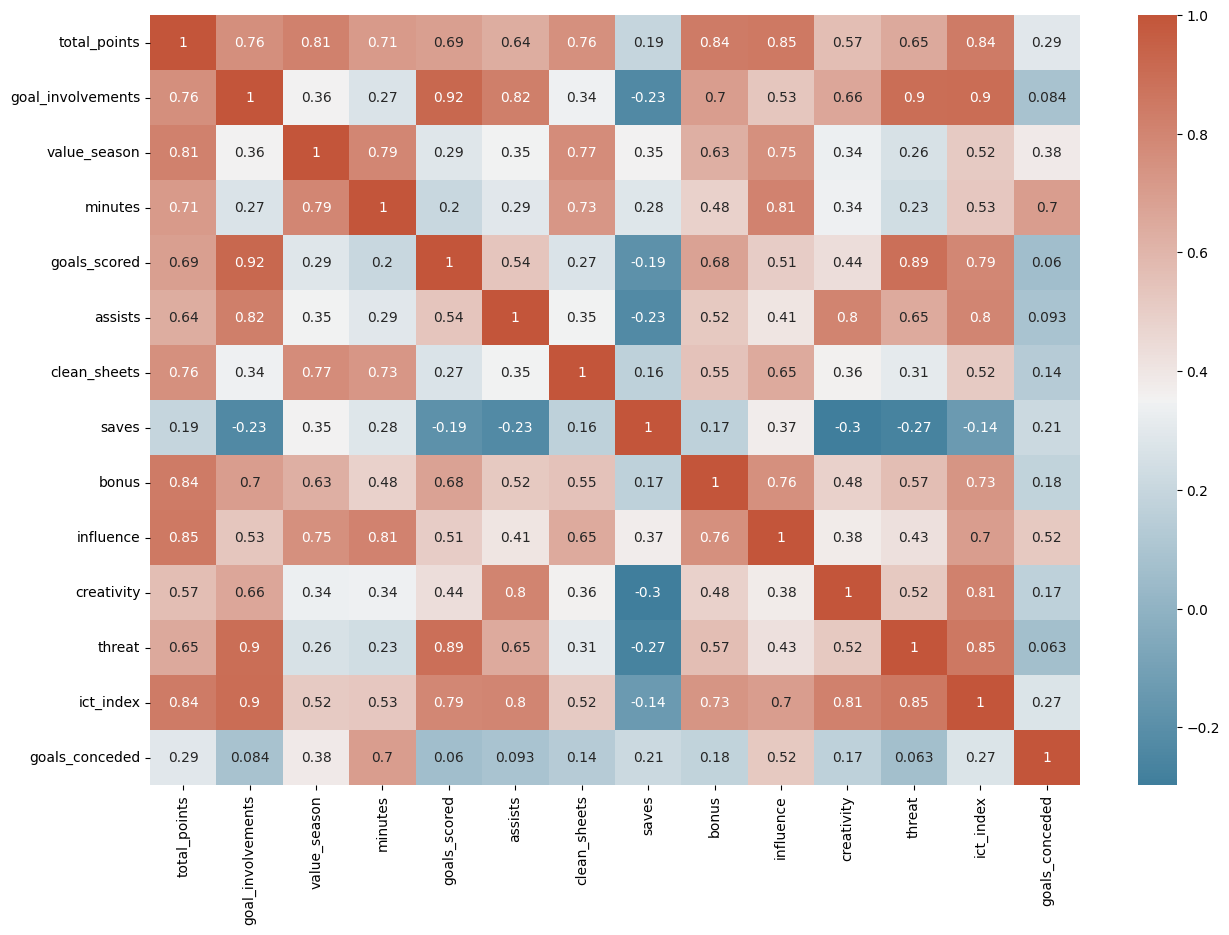

In [5]:
#plot 2 Correlation between different variables
corr_df = df[['total_points','goal_involvements', 'value_season','minutes', 'goals_scored', 'assists', 'clean_sheets',
      'saves', 'bonus', 'influence', 'creativity','threat', 'ict_index', 'goals_conceded']].corr()

f, ax = plt.subplots(figsize=(15,10))
#Configure custom diverging colormap
cmap = sns.diverging_palette(230,20, as_cmap=True)
#Draw map
sns.heatmap(corr_df, annot=True, cmap=cmap)
plt.show()

We see that for total points correlate columns are (80-85%):  influence, bonus, ict_index, value_season. Next we have 76% correlate cleansheets and goal_involvements, then (64%-71%) minutes, goals_scored, threat, assists. Creativity column only has 57% correlate. Naturally bonus and value_season should have this big number because they are strictly bond to points. Ict_index and influence is suprisingly very high, higher than cleansheets and goal_involvements which are naturally converted to points.
In this analysis firstly we will take up value_season, goal_involvements and cleensheets. We will analysis this column firstly by teams followed by positon and then by position and teams. On the second part we will detucted data base on ict_index, influence and bonus.


Let's compare some data in charts. Important plots for showing very relevant statistics distributed by teams. Firstly we will see the combined data by teams from all of positions and then we will analyze individual statistics by position.

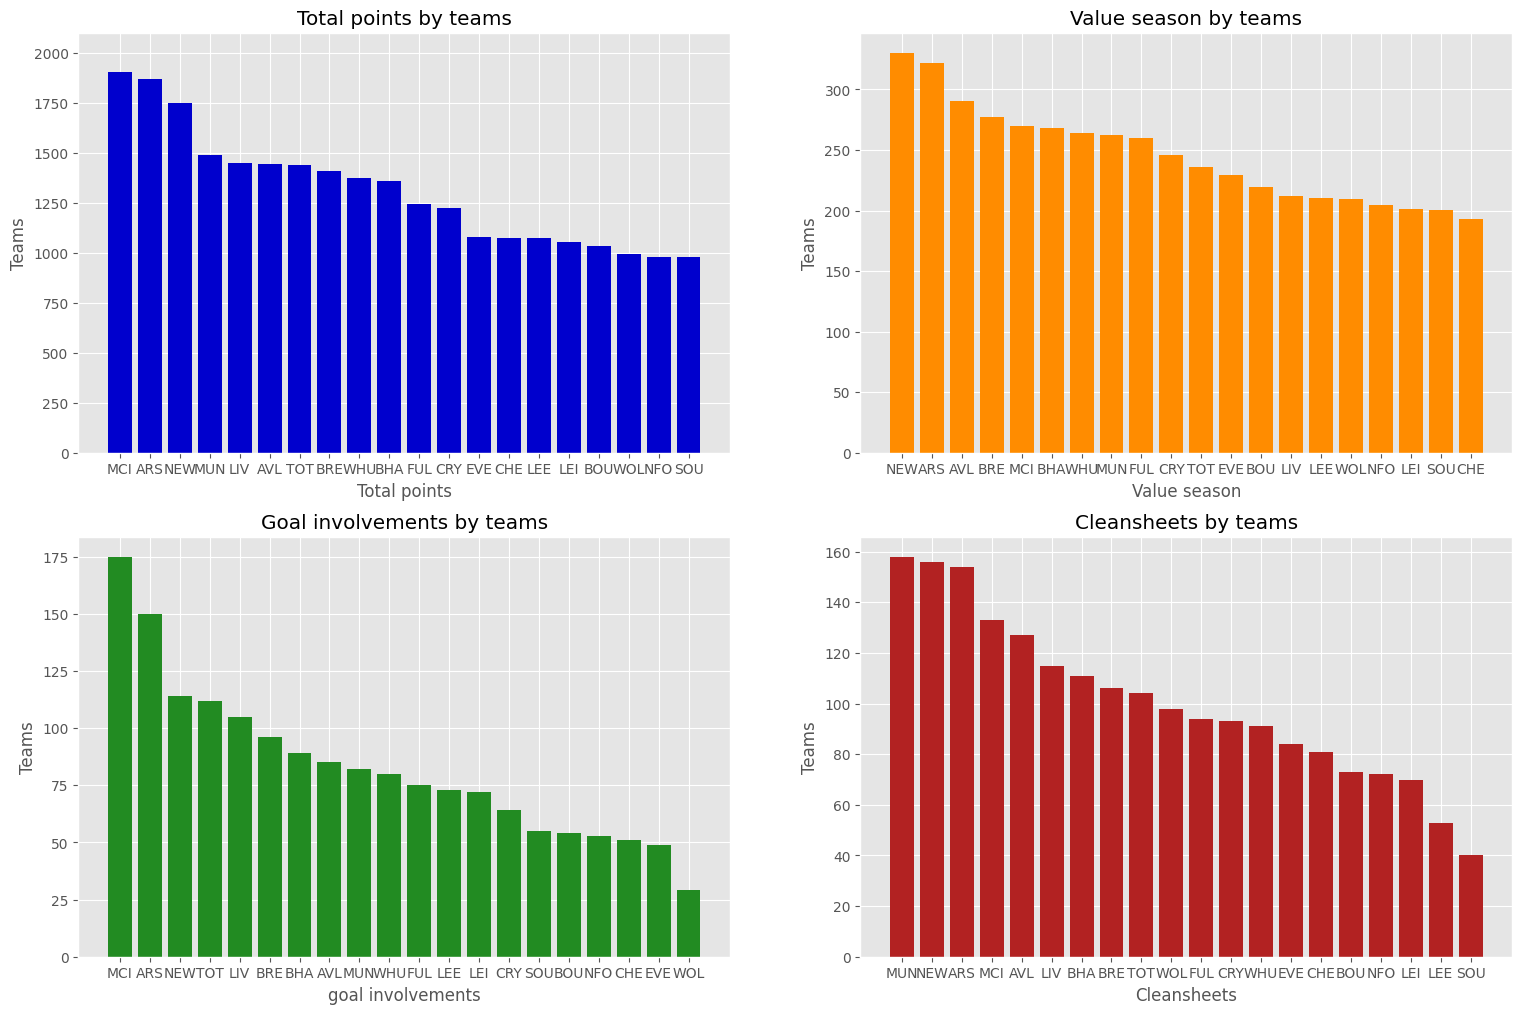

In [6]:
#plot 3 total points, value season, goal involvements, clean sheets by teams
plt.style.use('ggplot')
tp_df=df.pivot_table('total_points', index='team', aggfunc='sum').sort_values(by='total_points',ascending=False)
vs_df=df.pivot_table('value_season', index='team', aggfunc='sum').sort_values(by='value_season',ascending=False)
gi_df=df.pivot_table('goal_involvements', index='team', aggfunc='sum').sort_values(by='goal_involvements',ascending=False)
cs_df=df.pivot_table('clean_sheets', index='team', aggfunc='sum').sort_values(by='clean_sheets',ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(18.5,12))
(ax1, ax2), (ax3, ax4) = ax

#Plot 3_1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1,color='#0000CD')
ax1.set(title='Total points by teams', ylabel='Teams', xlabel='Total points')
ax1.axis(ymin=0,ymax=2100)

#Plot 3_2
x2 = vs_df.index
y2 = vs_df['value_season']
ax2.bar(x2, y2, color='#FF8C00')
ax2.set(title='Value season by teams', ylabel='Teams', xlabel='Value season')

#Plot 3_3
x3 = gi_df.index
y3 = gi_df['goal_involvements']
ax3.bar(x3, y3, color = '#228B22')
ax3.set(title='Goal involvements by teams', ylabel='Teams', xlabel='goal involvements')

#Plot 3_4
x4 = cs_df.index
y4 = cs_df['clean_sheets']
ax4.bar(x4, y4, color = '#B22222')
ax4.set(title='Cleansheets by teams', ylabel='Teams', xlabel='Cleansheets')

#plt.tight_layout()
plt.show()

Conclusions from this 4 plots. From 1st conclusions are simple we want as many players from Manchester City, Arsenal and Newcastle and from teams like Everton, Leeds, Chelsea, Leicester, Bournemouth,Wolverhampton,Nottingham Forrest, Southampton we don't pick as many players. From plot that shows value season we can see that Newcastle and Arsenal player's are the best in terms of value season. Aston Villa and Brentford are slightly worse but still great option. From top teams we see that Liverpool and Chelsea were performing very poorly. The 3rd graph shows goal involvements by team. This statistic reflects of sum of assists and goals. This measures the attack returns from players by team. Most contributed to this score were midfielders. But forwards and attacking defenders are also involved in this statistic. Manchester City and Arsenal are the most offence teams in the league. When we take cleensheets into analysis we can tell that players from Manchester United and Newcastle United are the best. Taking from that Newcastle United are relatively cheap cost we see that this is the best option. Then close enough are Arsenal and Manchester City.

Now let's see how points were distributed by all players and also by positions. This will give us general point of view to difference between positions.

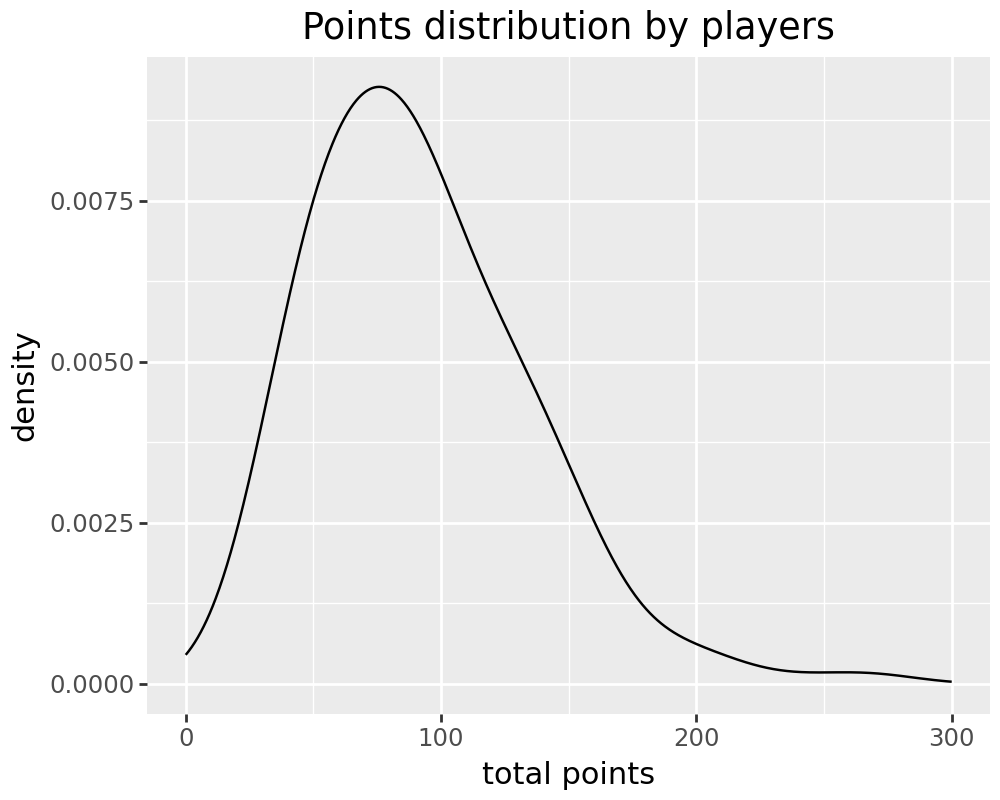

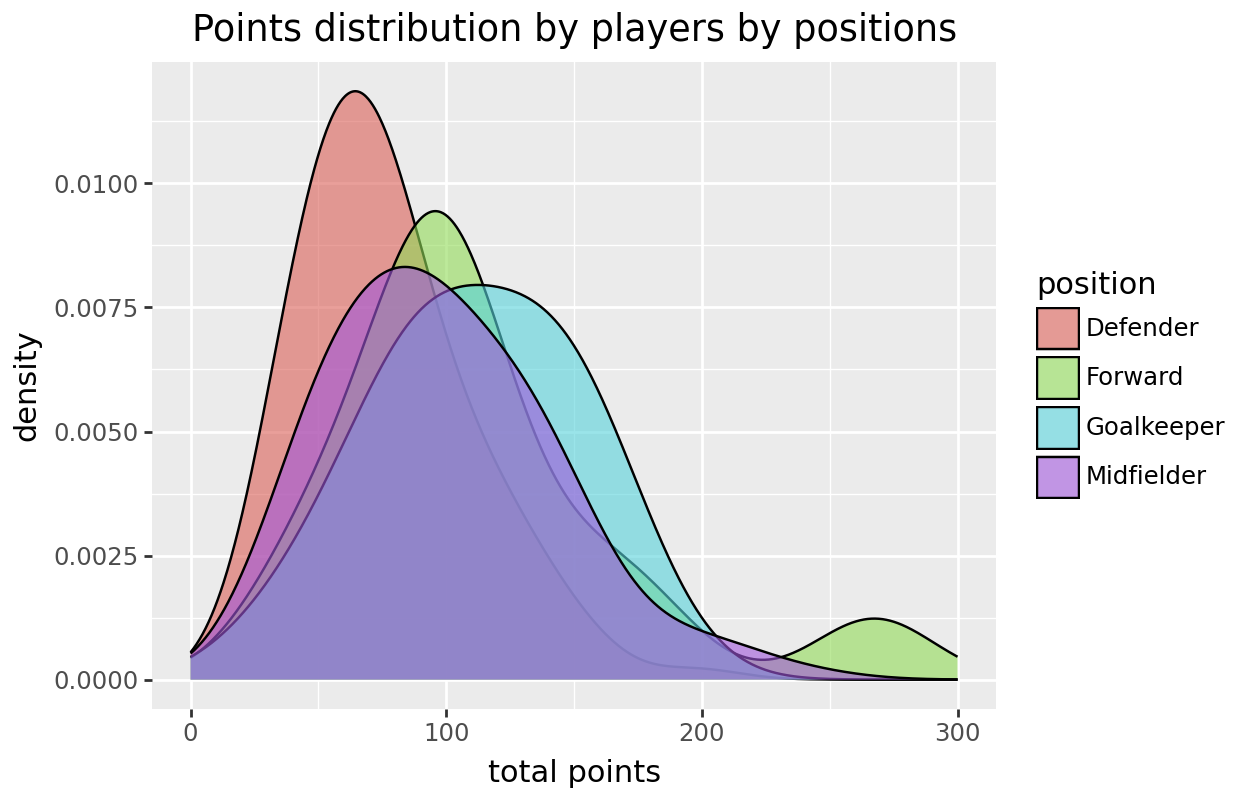

In [24]:
#plot 4 points of distribution
p4 = ggplot(df,aes(x= 'total_points')) + geom_density(adjust = 1.5, alpha = 0.6) + xlim(0,300) +\
      labs(x='total points', y='density', title='Points distribution by players') + theme(figure_size=(5, 4))
p4.show()

#plot 5 points of distribution by positions
p5 = ggplot(df,aes(x= 'total_points', group = 'position', fill='position')) + xlim(0,300) +\
     geom_density(adjust = 1.5, alpha = 0.6) +\
     labs(x='total points', y='density', title='Points distribution by players by positions') +\
     theme(figure_size=(6.2, 4))
p5.show()

We see that all of the players distribution graph is positively skewed with outliers on the right side. On the other graph we see the diffrence in distribution of each positions. Most resembling normal distribution were goalkeeper distribution. Then there were defenders that are also similiar to normal distribution but in these case with much smaller variance. Defenders and Goalkeepers distribution were almost symmetric.  But Midfielders and Forwards distribution were positively skewed, because of the outliers on the right side. In the following analysis we will use for defenders and goalkeepers mean as average statistic. For the skewed distribution we should use median as an average to not distort result by outliers. With this in mind we will use median for all of the statistics and positions in next plot.

More depth of analysis will be provided when splitting relevant statistics by position. Now let's see general plot that will the diffrence between each positions. 

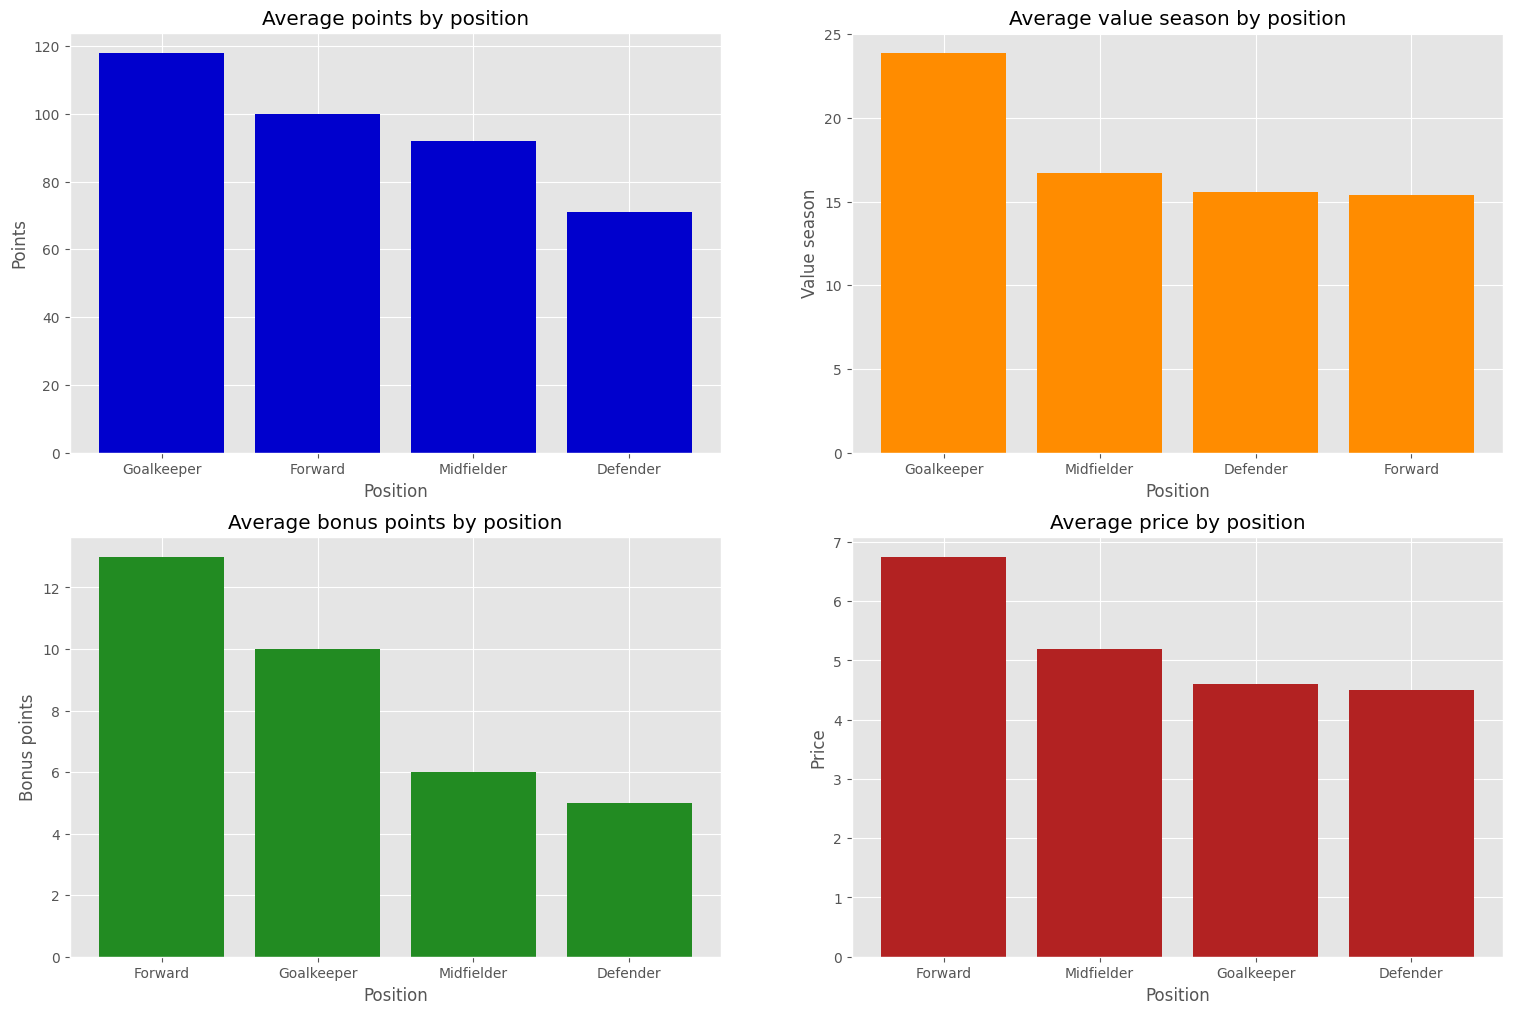

In [25]:
#plot 6 Average points, value season, bonus, price by position
tp_df = df.pivot_table('total_points', index='position', aggfunc='median').sort_values(by='total_points', ascending=False)
vs_df = df.pivot_table('value_season', index='position', aggfunc='median').sort_values(by='value_season', ascending=False)
b_df = df.pivot_table('bonus', index='position', aggfunc='median').sort_values(by='bonus', ascending=False)
pr_df = df.pivot_table('price', index='position', aggfunc='median').sort_values(by='price', ascending=False)

fg, ax = plt.subplots(2, 2, figsize=(18.5,12))
(ax1, ax2), (ax3, ax4) = ax

#Plot 6_1
x1 = tp_df.index
y1 = tp_df['total_points']
ax1.bar(x1, y1, color='#0000CD')
ax1.set(title='Average points by position', xlabel='Position', ylabel='Points')

#Plot 6_2
x2 = vs_df.index
y2 = vs_df['value_season']
ax2.bar(x2, y2, color='#FF8C00')
ax2.set(title='Average value season by position', xlabel='Position', ylabel='Value season')

#Plot 6_3
x3 = b_df.index
y3 = b_df['bonus']
ax3.bar(x3, y3, color='#228B22')
ax3.set(title='Average bonus points by position', xlabel='Position', ylabel='Bonus points')

#Plot 6_4
x4 = pr_df.index
y4 = pr_df['price']
ax4.bar(x4, y4, color='#B22222')
ax4.set(title='Average price by position', xlabel='Position', ylabel='Price')

plt.show()

At a glance we can see that goalkeeper position is very cheap but have the most points on average. This means that goalkeeper position is very steady.

More depth of analysis will be provided when divide data by team and also by positions. We will combine those two categories and make conclusions in this breakdown. Let's see plot of team points by position. 

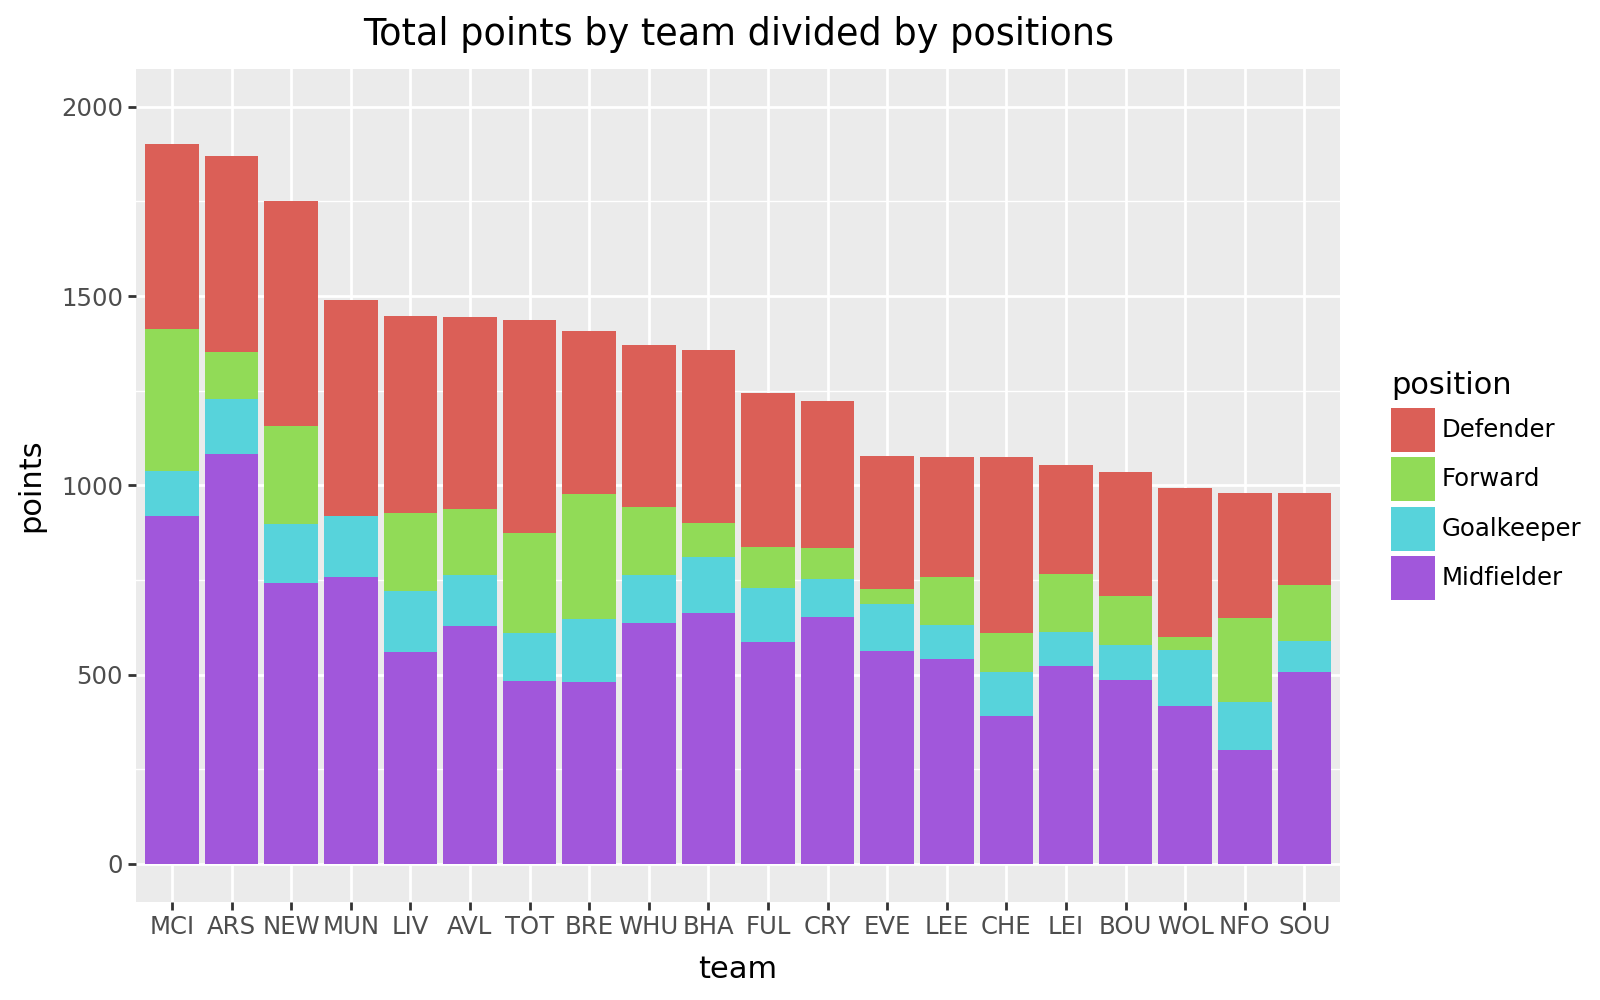

In [9]:
#plot 7 Total points by team divided by positions
team_order = ['MCI','ARS','NEW','MUN','LIV','AVL','TOT','BRE','WHU','BHA','FUL','CRY','EVE','LEE','CHE','LEI','BOU','WOL',
              'NFO','SOU']
tp_p_df = df.pivot_table('total_points', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
p7 = ggplot(tp_p_df) + aes(x = 'team' , y = 'total_points',  fill = 'position') + geom_col() +\
     labs(x='team', y='points', title='Total points by team divided by positions') + ylim(0,2000) +\
     scale_x_discrete(limits = team_order) + theme(figure_size=(8, 5))
p7.show()

In this graph we can observe more things to our analysis. We see that maybe overall team not perform well but midfielders from Southampton can be very budget friendly and not bad option. The same goes for midfielders from Crystal Palace, Brighton and West Ham United. Top option are players from Arsenal and Manchester City. In defender block cool budget option will be someone from Wolverhampton or Brighton. But overall best defenders will be from Tottenham, Newcastle United and Manchester United which is not that obvious .  In Forward area it is more about person performing because most teams usually play 1 forward, in some case 2. Two options definitely stand out which is Manchester City and Brentford. Both teams having top scorers Erling Haaland and Ivan Toney. For a goalkeeper an interesting option will be player from Nottingham Forest or Brentford. A little note that in Manchester United there are no points for forward, which means in majorty of games attacking side of a team was build by midfielders.

Let's see that our conclusions about graph is really true and see top 5 team options for each position.

In [10]:
print('Top 5 most points by position: ')
print(tp_p_df[tp_p_df['position'] == 'Midfielder'].sort_values(by=['total_points'],ascending=False).head(5))
print(tp_p_df[tp_p_df['position'] == 'Defender'].sort_values(by=['total_points'],ascending=False).head(5))
print(tp_p_df[tp_p_df['position'] == 'Forward'].sort_values(by=['total_points'],ascending=False).head(5))
print(tp_p_df[tp_p_df['position'] == 'Goalkeeper'].sort_values(by=['total_points'],ascending=False).head(5))

Top 5 most points by position: 
   team    position  total_points
3   ARS  Midfielder        1084.0
51  MCI  Midfielder         918.0
54  MUN  Midfielder         758.0
58  NEW  Midfielder         742.0
11  BHA  Midfielder         663.0
   team  position  total_points
55  NEW  Defender         595.0
52  MUN  Defender         570.0
67  TOT  Defender         563.0
44  LIV  Defender         521.0
0   ARS  Defender         518.0
   team position  total_points
49  MCI  Forward         375.0
17  BRE  Forward         332.0
68  TOT  Forward         263.0
56  NEW  Forward         257.0
60  NFO  Forward         222.0
   team    position  total_points
18  BRE  Goalkeeper         166.0
46  LIV  Goalkeeper         162.0
53  MUN  Goalkeeper         161.0
57  NEW  Goalkeeper         157.0
77  WOL  Goalkeeper         148.0


Everything concludes seems right. 
Now let's see another statistic by team by positions. And this statistic will be season_value which is total_points divided by price. This graph will be key for analysis of undervalued formations of teams. 

Now let's deeply analyse value season by team grouping the different roles of players.

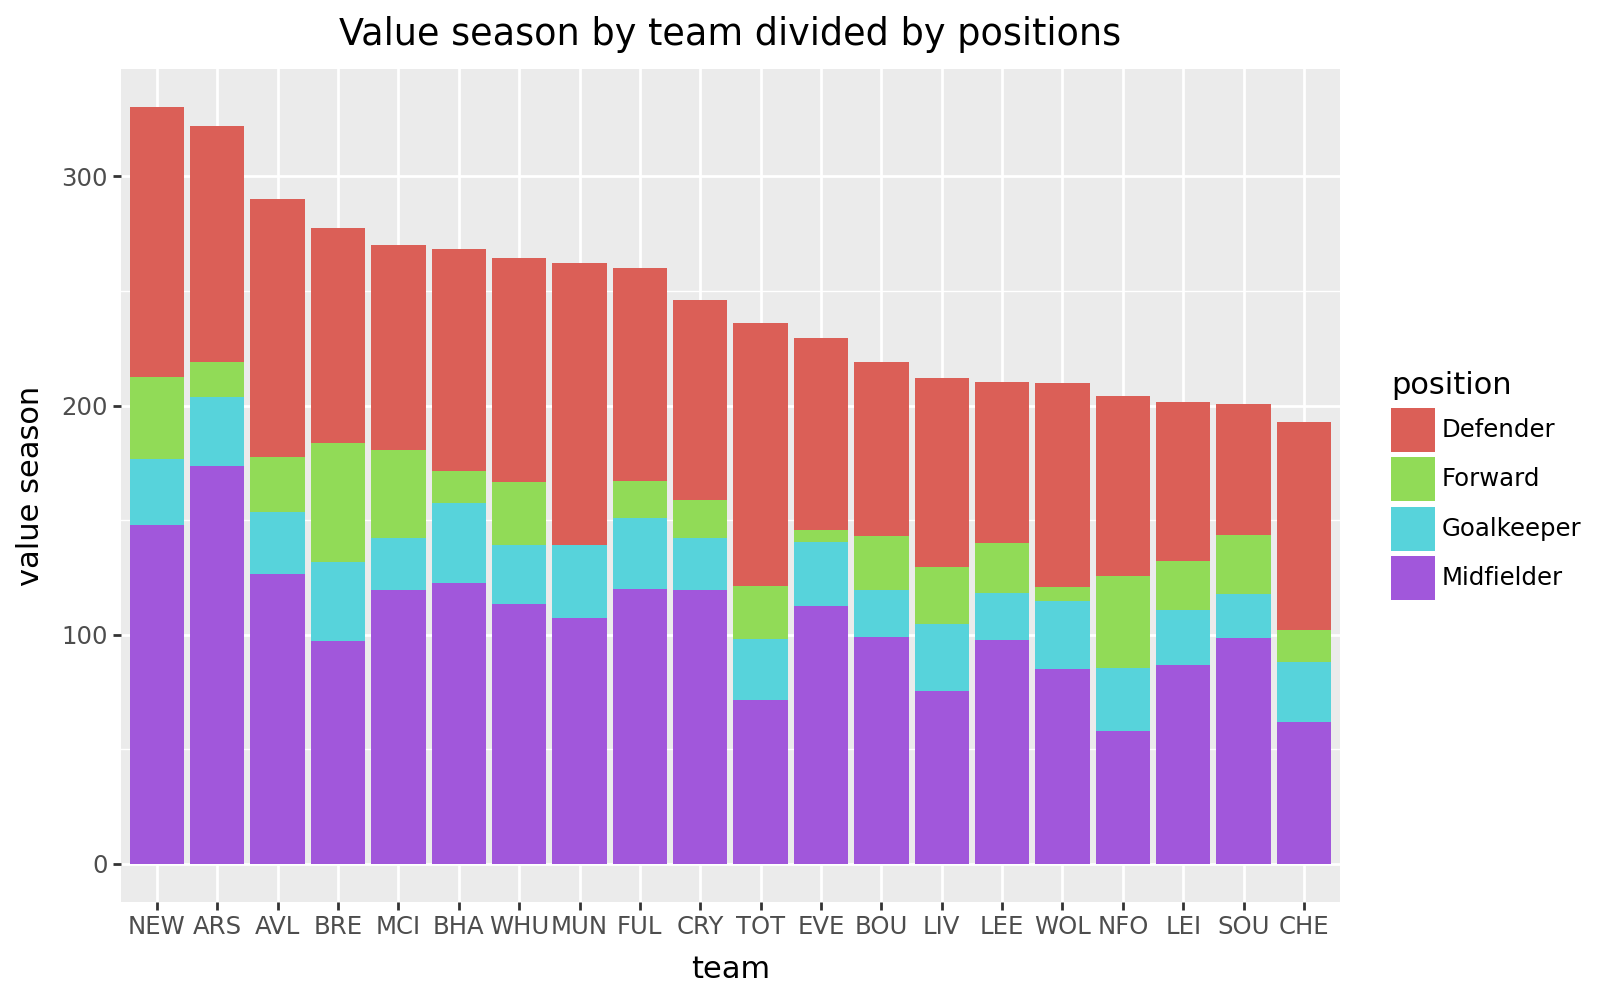

In [11]:
#plot 8 value season by positions
team_order = ['NEW','ARS','AVL','BRE','MCI','BHA','WHU','MUN','FUL','CRY','TOT','EVE','BOU','LIV','LEE','WOL','NFO','LEI',
              'SOU','CHE']
vs_p_df = df.pivot_table('value_season', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
p8 = ggplot(vs_p_df) + aes(x = 'team' , y = 'value_season',  fill = 'position') + geom_col() +\
     labs(x='team', y='value season', title='Value season by team divided by positions')  +\
     scale_x_discrete(limits = team_order) + theme(figure_size=(8, 5))
p8.show()

So we see that there are some great options in defence which are defenders and goalkeepers that have a lot season value. We are talking about Manchester United, Newcastle, Tottenham and Aston Villa. In attack 

Let's see top 5 teams in each positions.

In [12]:
#top 5 teams lead in value season by position
print('Top 5 most points by position: ')
print(vs_p_df[vs_p_df['position'] == 'Midfielder'].sort_values(by=['value_season'],ascending=False).head(5))
print(vs_p_df[vs_p_df['position'] == 'Defender'].sort_values(by=['value_season'],ascending=False).head(5))
print(vs_p_df[vs_p_df['position'] == 'Forward'].sort_values(by=['value_season'],ascending=False).head(5))
print(vs_p_df[vs_p_df['position'] == 'Goalkeeper'].sort_values(by=['value_season'],ascending=False).head(5))

Top 5 most points by position: 
   team    position  value_season
3   ARS  Midfielder         173.8
58  NEW  Midfielder         147.7
7   AVL  Midfielder         126.7
11  BHA  Midfielder         122.7
35  FUL  Midfielder         120.1
   team  position  value_season
52  MUN  Defender         123.3
55  NEW  Defender         117.7
67  TOT  Defender         114.8
4   AVL  Defender         112.4
0   ARS  Defender         103.0
   team position  value_season
17  BRE  Forward          51.9
60  NFO  Forward          40.1
49  MCI  Forward          38.8
56  NEW  Forward          35.8
72  WHU  Forward          27.6
   team    position  value_season
10  BHA  Goalkeeper          34.8
18  BRE  Goalkeeper          34.6
53  MUN  Goalkeeper          31.6
34  FUL  Goalkeeper          30.9
2   ARS  Goalkeeper          29.8



How this would look with breakdown by position.

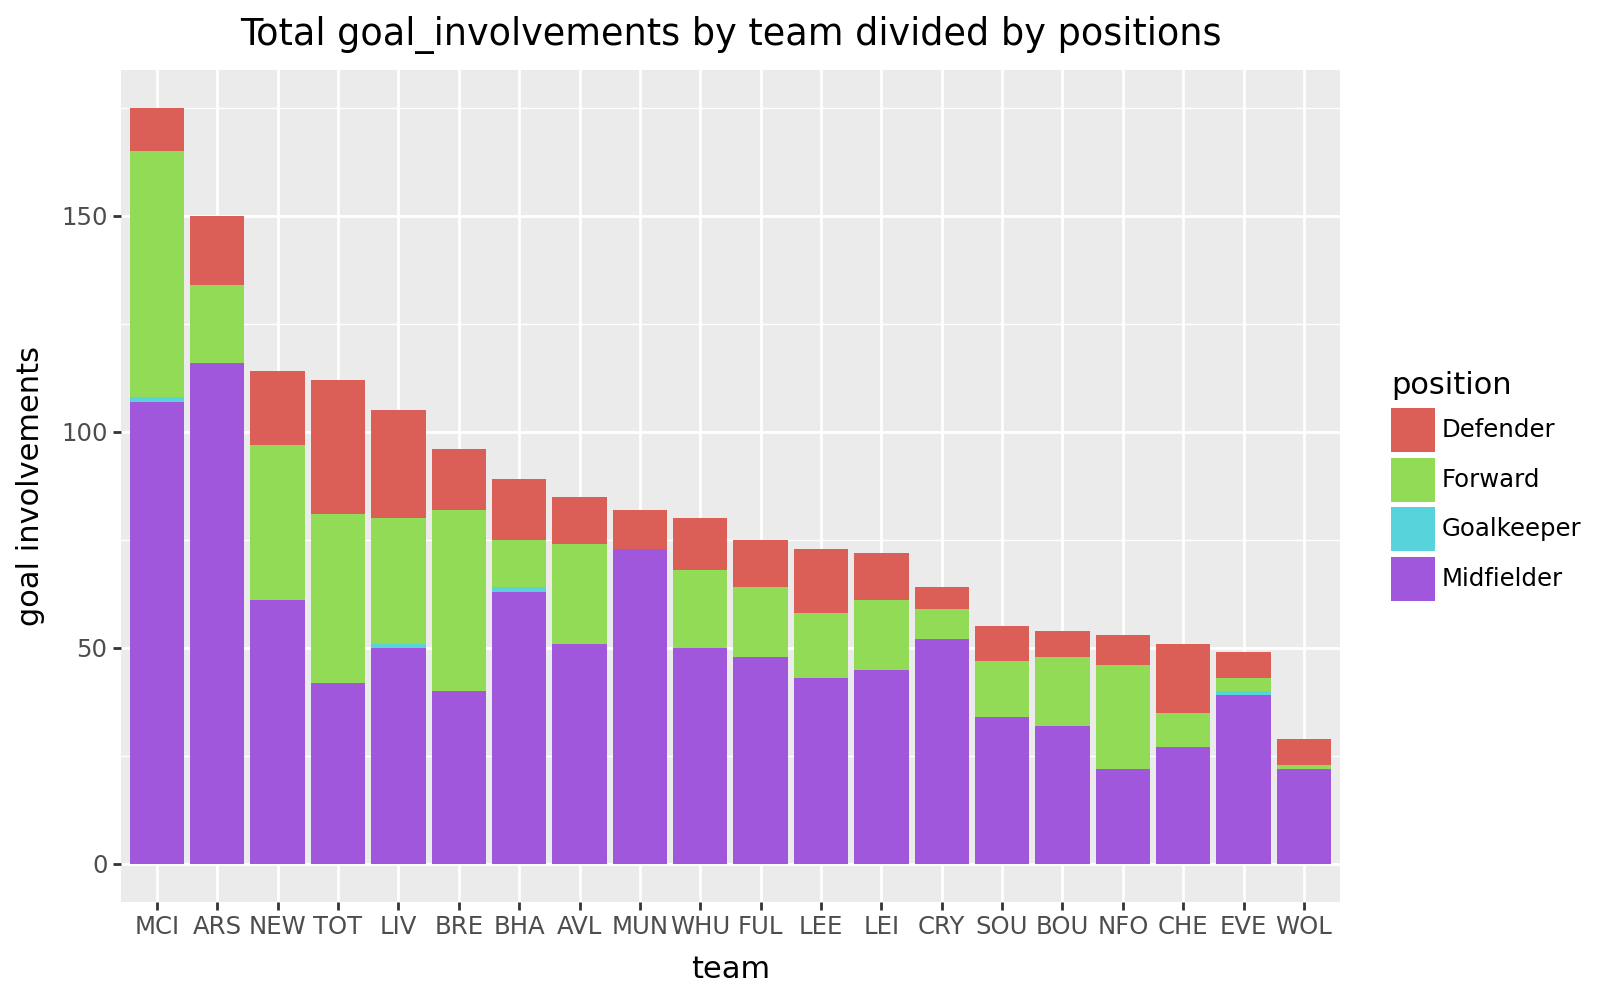

In [13]:
# plot 9 a goal involvement by team by position
team_order = ['MCI','ARS','NEW','TOT','LIV','BRE','BHA','AVL','MUN','WHU','FUL','LEE','LEI','CRY','SOU','BOU','NFO','CHE',
              'EVE','WOL']
tp_gi_df = df.pivot_table('goal_involvements', index=['team','position'], aggfunc='sum').reset_index().rename_axis()
tp_gi_df.sort_values(by='goal_involvements', ascending=False)
p9 = ggplot(tp_gi_df) + aes(x = 'team' , y = 'goal_involvements',  fill = 'position') + geom_col() +\
     labs(x='team', y='goal involvements', title='Total goal_involvements by team divided by positions') + scale_x_discrete(limits = team_order) +\
     theme(figure_size=(8, 5))
p9.show()

Naturally position of goalkeeper are not relevant in this statistic which results in only like 3 goal involvements, probably a long assist. Manchester City and arsenal are dominating goal involvements score as midfielders slightly behind them is Manchester United. We see that Totthenham and Liverpool defenders are the most offensive among all teams. Behind them there were Chelsea, Newcastle and Chelsea.

Now Let's take two most critical statistics which are goal involvements and cleansheets. Goal ivolvements are crucial for midfielders, forwards and defenders. On the other hand cleansheets are crucial for defenders and goalkeepers. To summarize analysis so far we will make scatter plots where on x axis will be season value. On y axis will be goal involvement for attackers and cleansheets for defence.

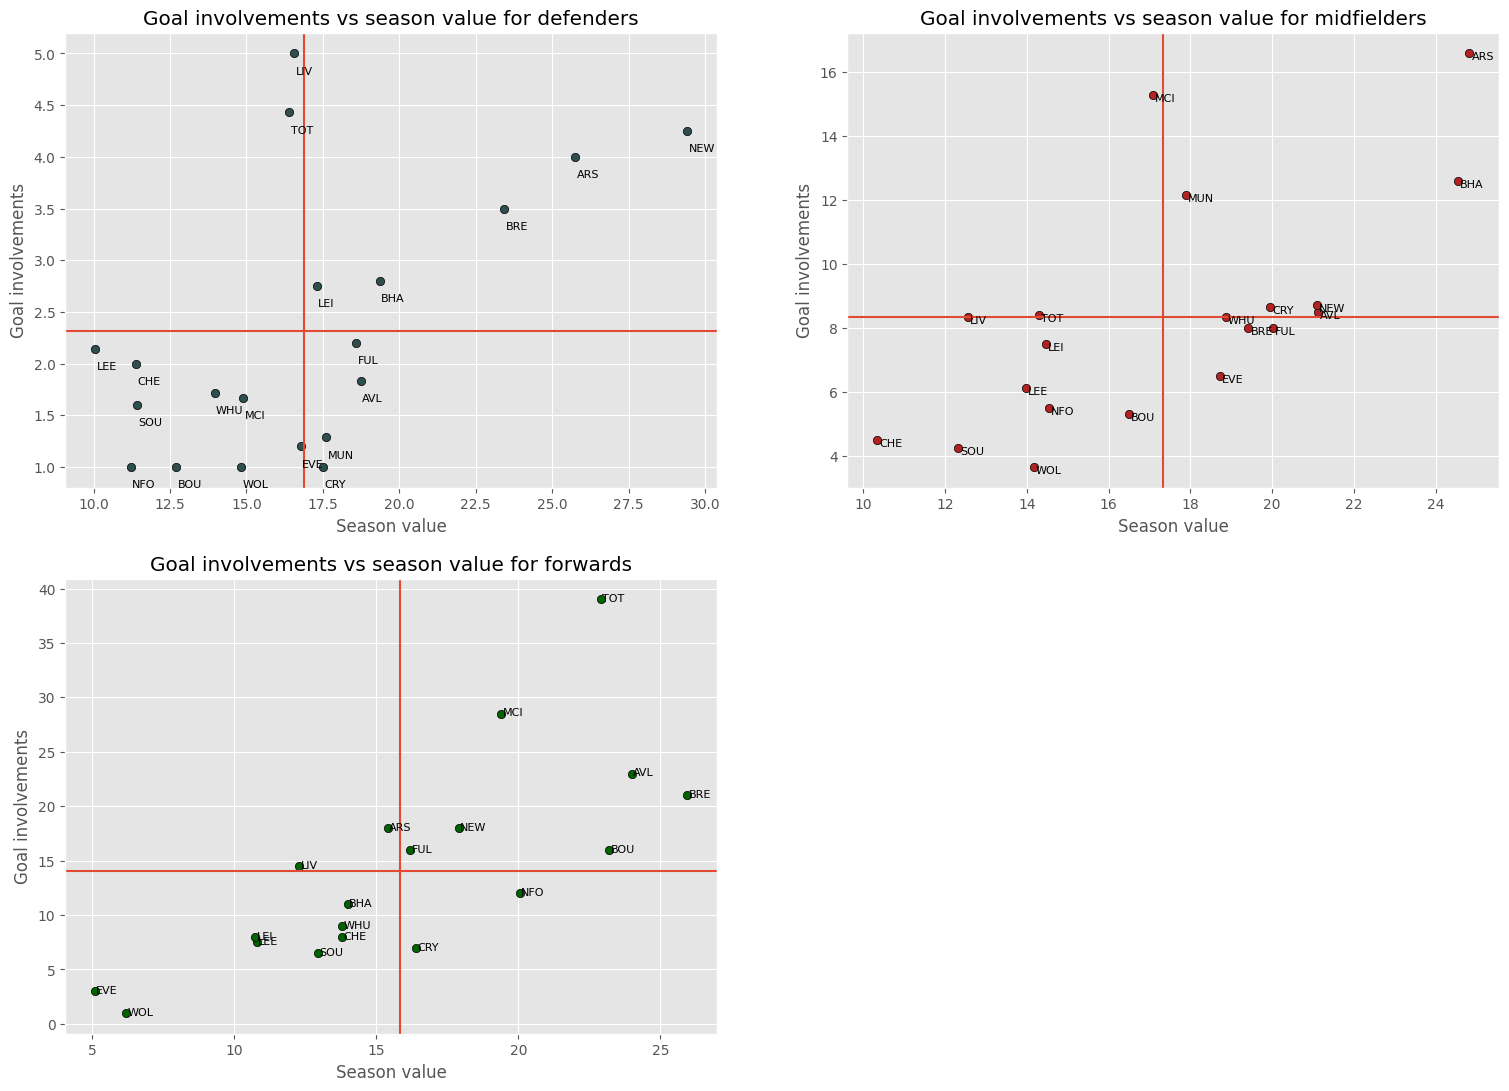

In [30]:
# plot 10 3 plots of goal involvements vs price mid,for,def
df_mid = df[df['position'] == 'Midfielder']
df_def = df[df['position'] == 'Defender']
df_for = df[df['position'] == 'Forward']
df_mid_team = df_mid.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_mid_team.sort_values(by='value_season', ascending=False)
df_def_team = df_def.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_def_team.sort_values(by='value_season', ascending=False)
df_for_team = df_for.groupby(['team']).aggregate({'goal_involvements': 'mean', 'value_season': 'mean'})
df_for_team.sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(2,2, figsize=(18.5,13))

(ax1, ax2), (ax3, ax4) = ax
ax[-1, -1].axis('off')

#Plot 10_1
x1 = df_def_team['value_season']
y1 = df_def_team['goal_involvements']
ax1.scatter(x1, y1, edgecolor='black', color='#2F4F4F')
ax1.set(title='Goal involvements vs season value for defenders', xlabel='Season value', ylabel='Goal involvements')

for i, txt in enumerate(df_def_team.index):
    ax1.annotate(txt, (x1[i]+.05, y1[i]-.20), fontsize=8)
ax1.axhline(y1.mean())
ax1.axvline(x1.mean())


#Plot 10_2
x2 = df_mid_team['value_season']
y2 = df_mid_team['goal_involvements']
ax2.scatter(x2, y2, edgecolor='black', color='#B22222')
ax2.set(title='Goal involvements vs season value for midfielders', xlabel='Season value', ylabel='Goal involvements')

for i, txt in enumerate(df_mid_team.index):
    ax2.annotate(txt, (x2[i]+.05, y2[i]-.20), fontsize=8)
ax2.axhline(y2.mean())
ax2.axvline(x2.mean())


#Plot 10_3
x3 = df_for_team['value_season']
y3 = df_for_team['goal_involvements']
ax3.scatter(x3, y3, edgecolor='black', color='#006400')
ax3.set(title='Goal involvements vs season value for forwards', xlabel='Season value', ylabel='Goal involvements')

ax3.axhline(y3.mean())
ax3.axvline(x3.mean())

ann_txt3 = df_for_team.index
for i, txt in enumerate(df_for_team.index):
    ax3.annotate(txt, (x3[i]+.05, y3[i]-.20), fontsize=8)

plt.show()

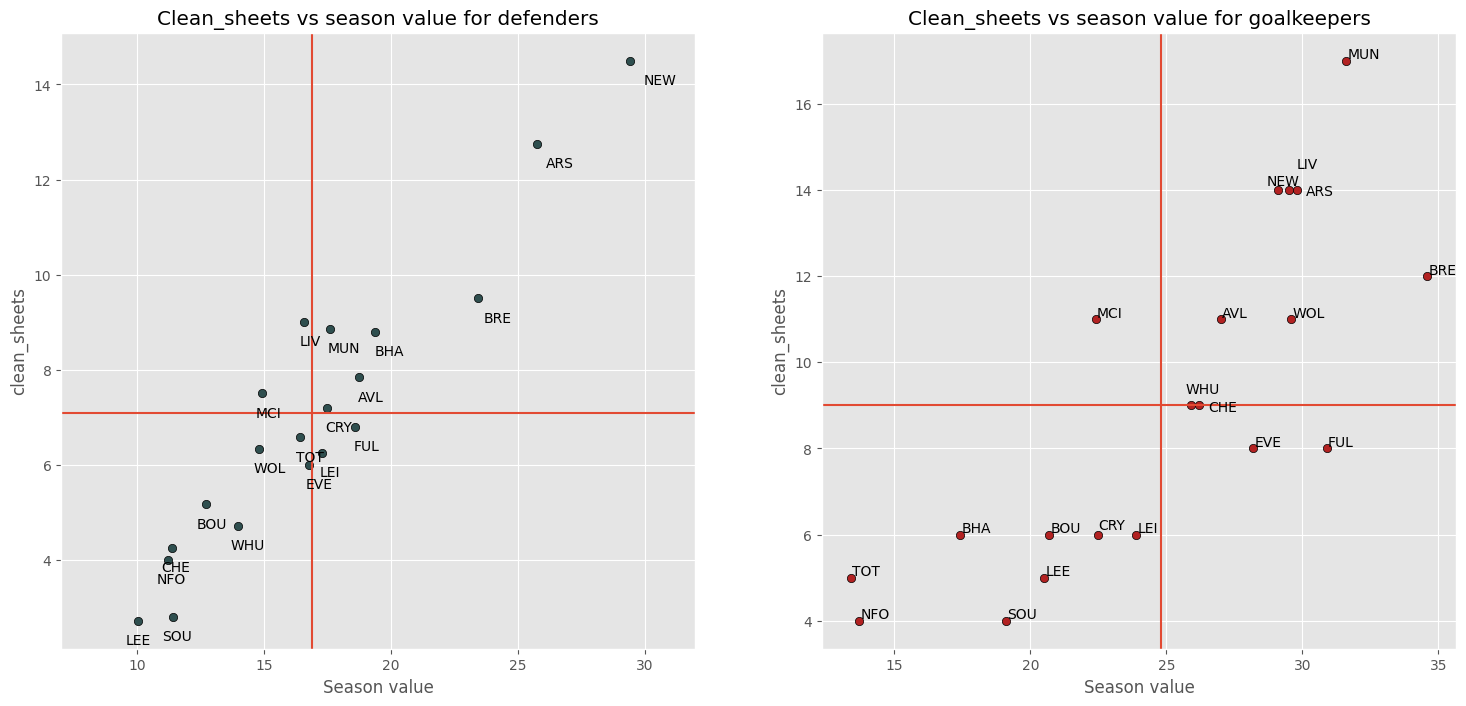

In [34]:
#plot 11 2 plots of clean sheets vs price gk, def
df_gk = df[df['position'] == 'Goalkeeper']
df_def_team = df_def.groupby(['team']).aggregate({'clean_sheets': 'mean', 'value_season': 'mean'})
df_def_team.sort_values(by='value_season', ascending=False)
df_gk_team = df_gk.groupby(['team']).aggregate({'clean_sheets': 'mean', 'value_season': 'mean'})
df_gk_team.sort_values(by='value_season', ascending=False)

fg, ax = plt.subplots(1,2, figsize=(18,8))
(ax1, ax2) = ax

#Plot 11_1
x1 = df_def_team['value_season']
y1 = df_def_team['clean_sheets']
ax1.scatter(x1, y1, edgecolor='black', color='#2F4F4F')
ax1.set(title='Clean_sheets vs season value for defenders', xlabel='Season value', ylabel='clean_sheets')
ax1.axhline(y1.mean())
ax1.axvline(x1.mean())
ax1.set_xlim(7, 32)
for i, txt in enumerate(df_def_team.index):
    ax1.annotate(txt, (x1[i]-1, y1[i]-0.5), fontsize=10, textcoords=('offset points', 'data'))
#texts = [ax1.text(x1[i], y1[i], df_def_team.index[i]) for i in range(len(df_gk_team))] #creating matplotlib.text list
#adjust_text(texts) # use adjust_text from adjust_Text library

#Plot 11_2
x2 = df_gk_team['value_season']
y2 = df_gk_team['clean_sheets']
ax2.scatter(x2, y2, edgecolor='black', color='#B22222')
ax2.set(title='Clean_sheets vs season value for goalkeepers', xlabel='Season value', ylabel='clean_sheets')
ax2.axhline(y2.mean())
ax2.axvline(x2.mean())
texts = [ax2.text(x2[i], y2[i], df_gk_team.index[i]) for i in range(len(df_gk_team))] #creating matplotlib.text list
adjust_text(texts) # use adjust_text from adjust_Text library


plt.show()

Analysis by player

Now that we earn some key information about data how position and teams affect statistics we will focus on single player. The statistics we will explore will be influence, ict index as at the start of this notebook we conclude that this also correlete with total points. We will furhter focus on player and seek to end goal of this analysis which will be diffrent optimal squad selection. 

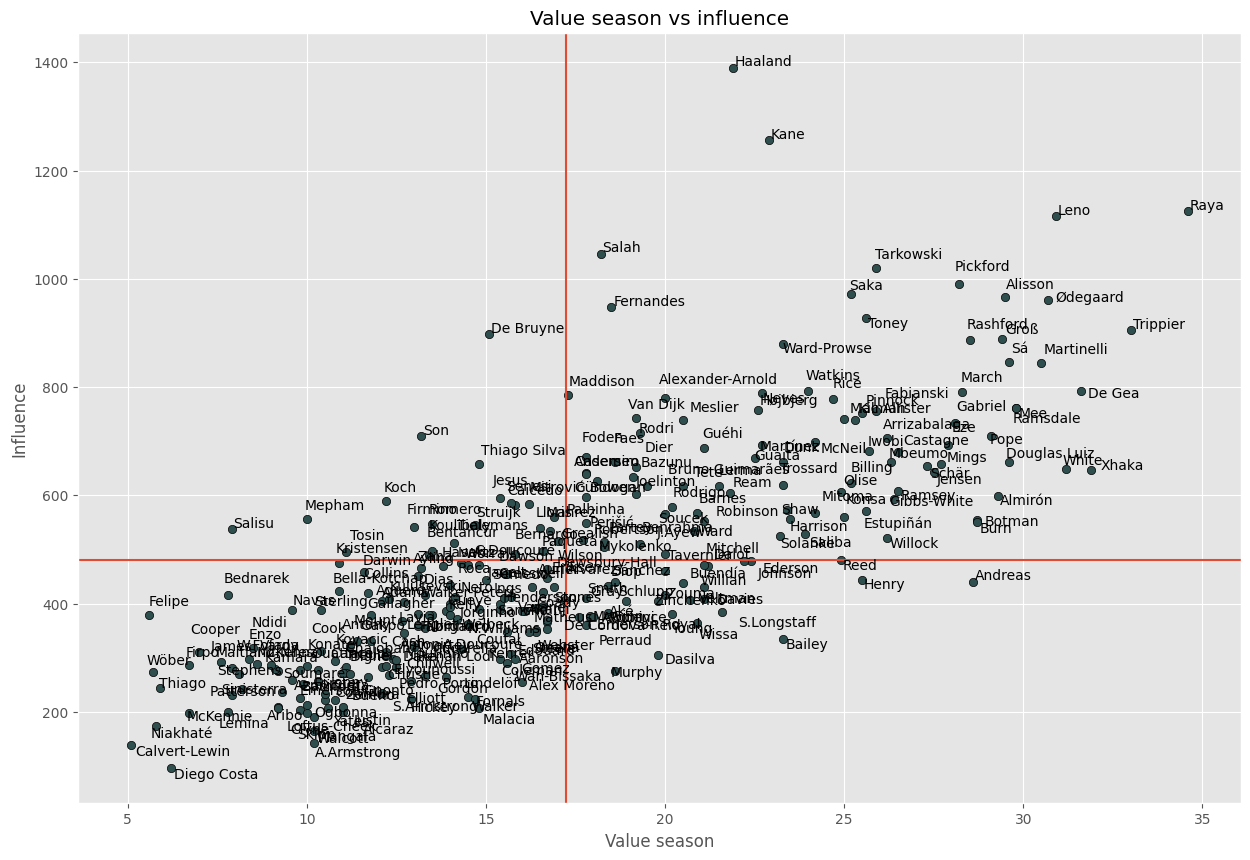

In [32]:
inf_df = df.groupby(['web_name']).aggregate({'influence': 'mean', 'value_season': 'mean'})
inf_df.sort_values(by='value_season', ascending=False)
ict_df = df.groupby(['web_name']).aggregate({'ict_index': 'mean', 'value_season': 'mean'})
ict_df.sort_values(by='value_season', ascending=False)
bonus_df = df.groupby(['web_name']).aggregate({'bonus': 'mean', 'value_season': 'mean'})
bonus_df.sort_values(by='value_season', ascending=False)

#Plot 12_1
fg, ax = plt.subplots(figsize=(15,10))
x = inf_df['value_season']
y = inf_df['influence']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs influence', xlabel='Value season', ylabel='Influence')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], inf_df.index[i]) for i in range(len(inf_df))] #creating matplotlib.text list
adjust_text(texts) # use adjust_text from adjust_Text library
plt.show()

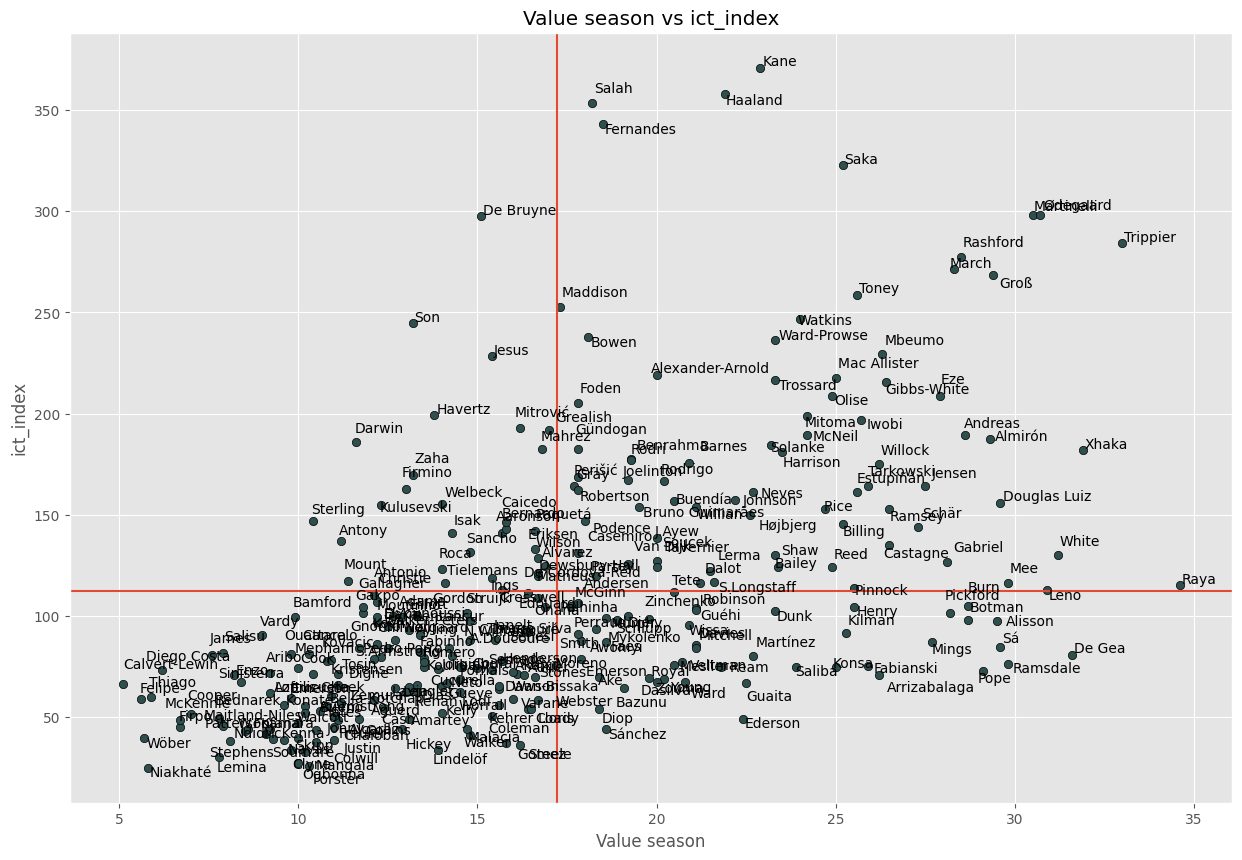

In [17]:
#Plot 12_2
fg, ax = plt.subplots(figsize=(15,10))
x = ict_df['value_season']
y = ict_df['ict_index']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs ict_index', xlabel='Value season', ylabel='ict_index')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], inf_df.index[i]) for i in range(len(ict_df))]
adjust_text(texts)
plt.show()

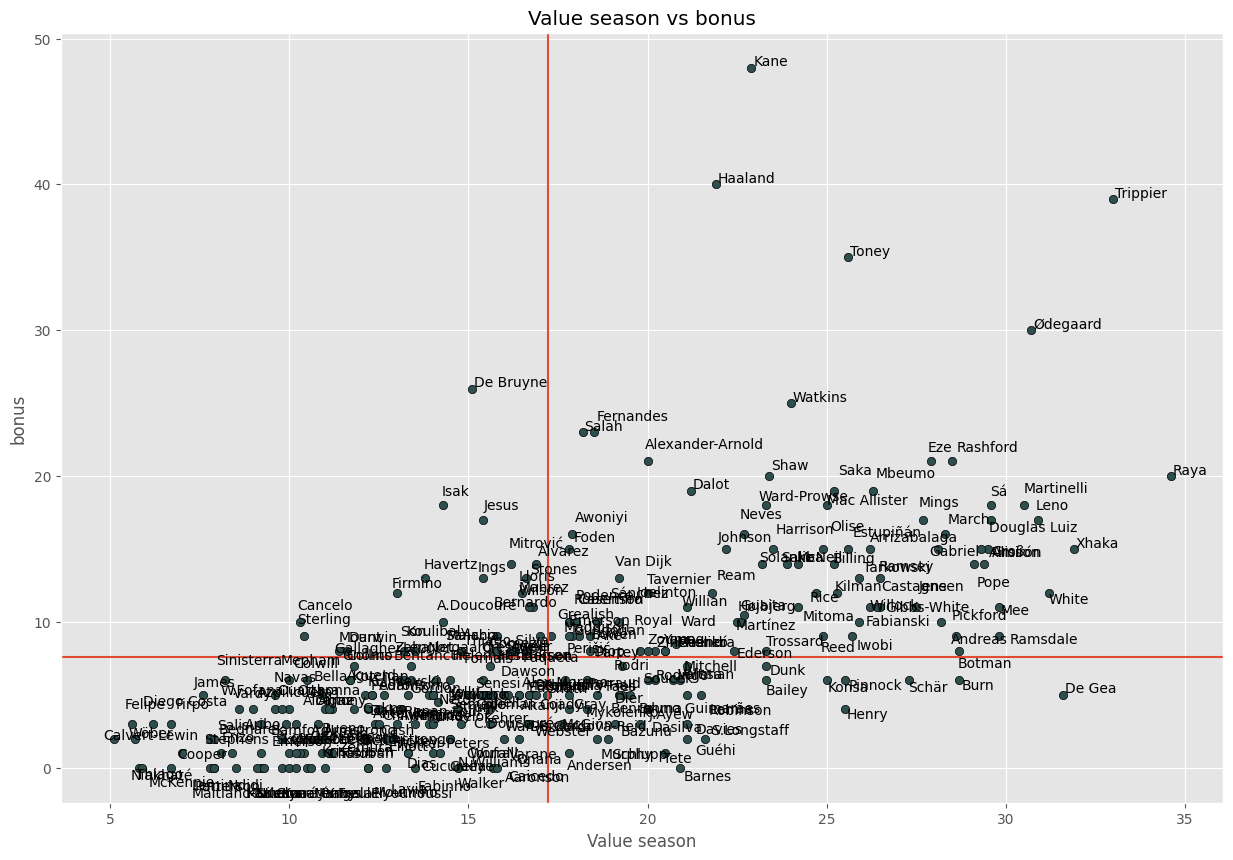

In [18]:
#Plot 12_3 
fg, ax = plt.subplots(figsize=(15,10))
x = bonus_df['value_season']
y = bonus_df['bonus']
ax.scatter(x, y, edgecolor='black', color='#2F4F4F')
ax.set(title='Value season vs bonus', xlabel='Value season', ylabel='bonus')
ax.axhline(y.mean())
ax.axvline(x.mean())
texts = [plt.text(x[i], y[i], bonus_df.index[i]) for i in range(len(bonus_df))]
adjust_text(texts)
plt.show()

Analiza

Now the last one part of this analysis when we gather all information deducted to select few squads and we will compare with each other. We will not be included goalkeepers as this position is not reliant on ict_index, creativity and influence. As we have all of the data we will asume that we will be at end of the season because the price of a players is also retrieved from the end of season. So we will set the budget to 96 mln , to have a room for purchasing goalkeepers (9 mln) then total budget will be 105 which with a changing price is reasonable. To make function choose all the 13 players we define a basic/starting money for a player which is 5 mln, function will cover that for a 13 player that amount will be saved. 

In [21]:
cols = ['first_name','second_name','team','position','total_points','price','ict_index','minutes','bonus','creativity',
        'influence',]
df_ct = df[cols] #dataframe from players will be chosen

df_ct['name'] = df_ct['first_name'].str.cat(df['second_name'], sep=' ')  #merging two columns
teams = df_ct['team'].unique() # list of all teams

def choose_team(df_ordered):
    team_limit = dict(zip(teams, [3 for _ in range(20)])) # dictionary for team limit
    pos_limit = {'Goalkeeper': 0, 'Defender': 5, 'Midfielder': 5, 'Forward': 3}  # dictionary for position limit
    cols = ['name','team','position','total_points','price','ict_index','minutes','bonus','creativity','influence']
    
    squad = pd.DataFrame(columns=cols)
    total_points = 0
    budget = 96
    for id, row in df_ordered.iterrows():
        #checking if price,pos_limit, team_limit and future picking player will fit in budget
        if budget >= row.price and pos_limit[row.position] != 0 and team_limit[row.team] != 0 and \
           ((budget - 5*(sum(pos_limit.values())-1)) - row['price']) >=0 :
            squad = pd.concat([squad, pd.DataFrame([row])])
            budget -= row.price
            pos_limit[row.position] -= 1
            team_limit[row.team] -= 1
            total_points += row.total_points
    print(squad)
    print("Remaining budget: " + str((round(budget,2))), ', ', 'points:', total_points)


df_ct = df_ct.drop(['first_name', 'second_name'], axis=1)
df_ct_ordered_points = df_ct.sort_values(by='total_points', ascending=False)
df_ct_ordered_ict = df_ct.sort_values(by='ict_index', ascending=False)
df_ct_ordered_creativity = df_ct.sort_values(by='creativity', ascending=False)
df_ct_ordered_influence = df_ct.sort_values(by='influence', ascending=False)
df_ct_ordered_bonus = df_ct.sort_values(by='bonus', ascending=False)
#pd.set_option('display.expand_frame_repr',False)
#pd.reset_option('all')

print('Team chosed by points: ')
choose_team(df_ct_ordered_points)
print('\n Team chosed by ict_index: ')
choose_team(df_ct_ordered_ict)
print('\n Team chosed by creativity: ')
choose_team(df_ct_ordered_creativity)
print('\n Team chosed by influence: ')
choose_team(df_ct_ordered_influence)
print('\n Team chosed by bonus: ')
choose_team(df_ct_ordered_bonus)

Team chosed by points: 
                         name team    position  total_points  price  ict_index  minutes  bonus  creativity  influence
489            Erling Haaland  MCI     Forward         272.0   12.4      358.1   2767.0   40.0       371.0     1390.0
673                Harry Kane  TOT     Forward         263.0   11.5      371.0   3406.0   48.0       744.8     1256.6
445             Mohamed Salah  LIV  Midfielder         239.0   13.1      353.7   3290.0   23.0       869.9     1046.2
4             Martin Ødegaard  ARS  Midfielder         212.0    6.9      298.3   3132.0   30.0      1100.4      960.0
516           Marcus Rashford  MUN  Midfielder         205.0    7.2      277.6   2880.0   21.0       459.7      887.8
10                Bukayo Saka  ARS  Midfielder         202.0    8.0      322.8   3183.0   19.0      1091.8      972.2
15   Gabriel Martinelli Silva  ARS  Midfielder         198.0    6.5      298.1   2789.0   18.0       838.1      844.2
146                   Ben Mee  B